# Régression linéaire

## Librairies

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Dataset

In [2]:
def fc_lin(beta_0, beta_1, x):
    y = beta_0 + beta_1 * x
    return y

In [3]:
fc_lin(beta_0=0.4, beta_1=1.8, x=3)

5.800000000000001

In [4]:
X = np.random.uniform(0, 10, 200)

In [5]:
y = fc_lin(beta_0=0.4, beta_1=1.8, x=X) + np.random.normal(0, 3, size=X.shape)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160,), (160,), (40,), (40,))

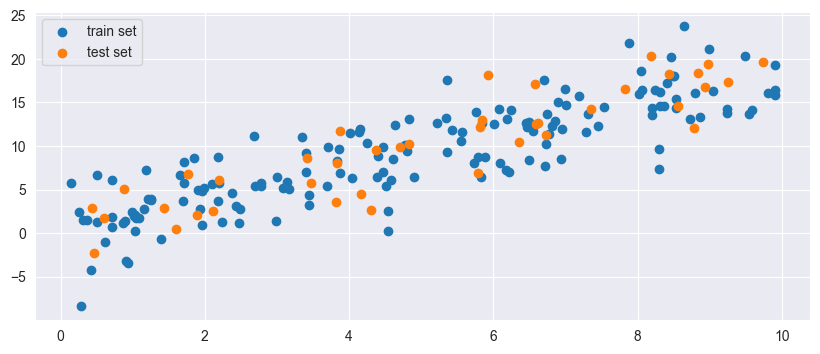

In [8]:
plt.figure(figsize=(10, 4))
plt.scatter(X_train, y_train, label="train set")
plt.scatter(X_test, y_test, label="test set")
plt.legend()
plt.show()

## Model 1

In [84]:
x_bar = np.mean(X_train)
y_bar = np.mean(y_train)

num = np.sum((X_train - x_bar) * (y_train - y_bar))
den = np.sum((X_train - x_bar)**2)

beta_hat_1 = num / den
beta_hat_0 = y_bar - beta_hat_1 * x_bar

In [85]:
beta_hat_0, beta_hat_1

(np.float64(-0.5153209600408424), np.float64(1.9548067130394036))

In [86]:
def model(x):
    return beta_hat_0 + beta_hat_1*x

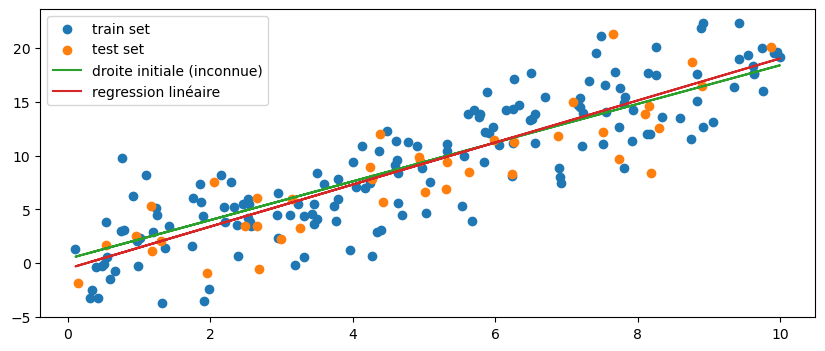

In [87]:
plt.figure(figsize=(10, 4))
plt.scatter(X_train, y_train, label="train set")
plt.scatter(X_test, y_test, label="test set")
plt.plot(X_train, fc_lin(beta_0=0.4, beta_1=1.8, x=X_train), 
         label="droite initiale (inconnue)", 
         color="C2")
plt.plot(X_train, model(X_train), 
         label="regression linéaire", 
         color="C3")
plt.legend()
plt.show()

In [88]:
y_test_pred = model(X_test)

In [89]:
y_test_pred, y_test

(array([ 9.13185136,  5.64142402,  9.86680813, 14.59798656, 15.33022602,
        15.69576508,  8.05758269, 14.43310247,  3.30080457,  9.29755707,
        15.49235214, 12.92639116,  5.33514461,  9.16059102,  2.03118069,
        -0.24008198, 14.16672094, 15.43310573,  1.35640245,  4.35214356,
        10.48514257,  5.85893126, 11.71702149,  1.78314283,  8.13364211,
        11.17855884,  4.72471503,  4.67206472,  1.77702517,  4.66464897,
         0.53279254, 13.34043306, 11.6677525 ,  7.77119326,  9.89594093,
        16.62115334, 18.77695887,  3.49794242,  7.84167168, 16.88145745]),
 array([ 9.84220418,  5.99312811,  6.89017297,  9.70924751, 13.88930341,
        12.51318415, 12.03225083, 21.25914458, -0.89888121,  6.60549507,
         8.33951108, 11.86196177,  2.20636966,  9.49626859,  2.06663048,
        -1.83150728, 12.16677424, 14.56236958,  2.50900242,  3.41093086,
         8.47624922,  3.24512113, 11.21160023,  1.09280711,  5.63992366,
        11.44609065, -0.5562719 ,  6.02067775,  5

In [90]:
RSS = np.sum((y_test_pred - y_test)**2)

In [91]:
RSS

np.float64(306.14383835930744)

## Model 2

In [109]:
# 1. Instanciation du modèle
lr = LinearRegression()

# 2. Entraînement sur le le test set (fit)
lr.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

# 3. Préduction sur le test set (predict)
y_test_pred = lr.predict(X_test.reshape(-1, 1))

In [110]:
lr.intercept_, lr.coef_

(array([-0.51532096]), array([[1.95480671]]))

In [111]:
y_test_pred

array([[ 9.13185136],
       [ 5.64142402],
       [ 9.86680813],
       [14.59798656],
       [15.33022602],
       [15.69576508],
       [ 8.05758269],
       [14.43310247],
       [ 3.30080457],
       [ 9.29755707],
       [15.49235214],
       [12.92639116],
       [ 5.33514461],
       [ 9.16059102],
       [ 2.03118069],
       [-0.24008198],
       [14.16672094],
       [15.43310573],
       [ 1.35640245],
       [ 4.35214356],
       [10.48514257],
       [ 5.85893126],
       [11.71702149],
       [ 1.78314283],
       [ 8.13364211],
       [11.17855884],
       [ 4.72471503],
       [ 4.67206472],
       [ 1.77702517],
       [ 4.66464897],
       [ 0.53279254],
       [13.34043306],
       [11.6677525 ],
       [ 7.77119326],
       [ 9.89594093],
       [16.62115334],
       [18.77695887],
       [ 3.49794242],
       [ 7.84167168],
       [16.88145745]])